In [3]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

In [4]:
header = ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship',
          'race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']
data = pd.read_csv('C:/Users/Looly/ML/Dataset.data', sep = ' ', names = header)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Модель логистической регрессии

In [5]:
from sklearn.linear_model import LogisticRegression

Шаг 1. Предобработка данных. Для работы с переменными в рамках задачи Логистической регрессии нужно преобразовать категориальные переменные в числа. Например, вот так (см. рис), просто поставить в соответствие названию машин - уникальные числа.

In [6]:
# попробуем выбрать какие-нибудь признаки, для начала
selectedColumns = data [['age', 'education','income','workclass','race','gender']]

# столбец education - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['education','workclass','race','gender'])

# столбец sex является целевой переменной, удаляем его из Х
del X['income']

print('Пометили образование единичкой.')
X.head()

Пометили образование единичкой.


,age,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,...,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [7]:
from sklearn.linear_model import LogisticRegression

LabelEncoder ставит в соответствие значению дохода (<=50K, >50K) 0 и 1

In [8]:
# целевая переменная (столбец income) снова является категориальной 
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['income'])

LabelEncoder()

In [9]:
# записываем в таргетную переменную y преобразованный столбец sex
y = pd.Series (data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [10]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [11]:
model = LogisticRegression(max_iter=1000) # берем в качестве модели логистическую регресиию из scikit-learn

Шаг 2 Текст, выделенный полужирным шрифтом. Обучение. Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору</p>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [14]:
predictions[:100] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [15]:
model.predict_proba(X_test)

array([[0.86941399, 0.13058601],
       [0.91589136, 0.08410864],
       [0.74039908, 0.25960092],
       ...,
       [0.90282058, 0.09717942],
       [0.68076596, 0.31923404],
       [0.91964116, 0.08035884]])

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [16]:
model.score(X_train, y_train) 

0.7991459241276434

In [17]:
model.score(X_test,y_test)

0.8002456834777861

### Метод опорных векторов. SVM.

In [18]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

<p>Снова получаем наш скор, для обучающей и тестовой выборок.</p>

In [19]:
clf.score(X_train, y_train) 

0.8058732340811372

In [20]:
clf.score(X_test, y_test)

0.8073432061693852

# Оценка качества модели

Задание

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [22]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob > 0.5: 
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [23]:
pred = model.predict(X_test)

In [24]:
tp, fp, fn, tn

(1217, 724, 2203, 10509)

In [25]:
# какая точность получилась?
accuracy = (tp + tn) / (tp + fp + fn + tn)
accuracy

0.8002456834777861

In [26]:
precision = tp / (tp + fp)
precision

0.6269963936115405

In [27]:
recall = tp / (tp + fn)
recall 

0.35584795321637425

In [28]:
from sklearn.metrics import recall_score, precision_score

In [30]:
recall_score(y_test, pred)

0.35584795321637425

In [32]:
precision_score(y_test, pred)

0.6269963936115405

In [33]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [35]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [36]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9648646030426131)
(0.0, 0.00029239766081871346, 0.9648646030426132)
(0.0, 0.0014619883040935672, 0.9512459740653694)
(0.0, 0.0020467836257309943, 0.9489532020493118)
(0.0, 0.0023391812865497076, 0.9488113559706672)
(8.902341315766046e-05, 0.0023391812865497076, 0.947063959342301)
(8.902341315766046e-05, 0.0029239766081871343, 0.9462994122674375)
(8.902341315766046e-05, 0.003801169590643275, 0.9440533298057879)
(0.00017804682631532092, 0.003801169590643275, 0.9426633144053774)
(0.00017804682631532092, 0.005847953216374269, 0.9371996448759373)


In [37]:
import  matplotlib.pyplot as plt

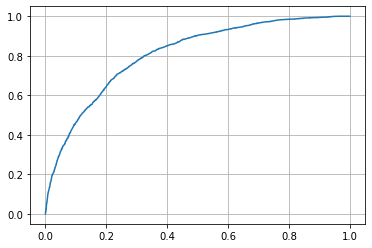

In [47]:
plt.plot( fpr, tpr )
plt.grid()

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

roc_auc_score( y_test, predictions[:, 1] )

0.8087968407621029

In [42]:
from sklearn.metrics import auc

auc( fpr, tpr )

0.8087968407621029

### Precision Recall  

In [49]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )
pr.shape, thres.shape

((4455,), (4454,))

In [50]:
# посмотрим что получилось
for line in zip( pr[:10], re[:10], thres[:10] ):
    print( line )

(0.23973082854338987, 1.0, 0.013146456105577813)
(0.23969433538979248, 0.9997076023391813, 0.013165007695569995)
(0.2397279483943346, 0.9997076023391813, 0.013291648164809109)
(0.2397447584320875, 0.9997076023391813, 0.013294750056646027)
(0.23981202216455075, 0.9997076023391813, 0.013422621603717573)
(0.23991298856220616, 0.9997076023391813, 0.013445584641120521)
(0.23992982456140352, 0.9997076023391813, 0.013462889673432515)
(0.23994666292371394, 0.9997076023391813, 0.013720914591011884)
(0.2399775328231412, 0.9994152046783625, 0.013740265539847828)
(0.2399943828114029, 0.9994152046783625, 0.013875597406636868)


(0.0, 1.0)

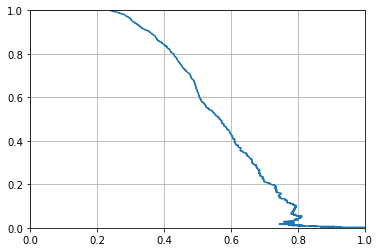

In [51]:
# строем график кривой
plt.plot(pr,re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [53]:
from sklearn.metrics import average_precision_score
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.5640410917185532